In [2]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import normal
from numpy import hstack
import seaborn as sns
from math import sqrt, log, exp, pi
from scipy import stats

In [3]:
sample1 = normal(loc= 20, scale=5, size=4000)
sample2 = normal(loc= 40, scale=5, size=8000)
sample = hstack((sample1, sample2))

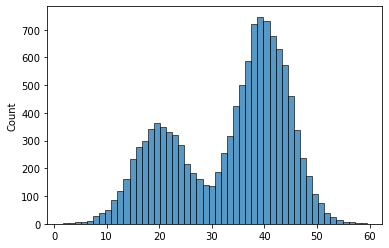

In [4]:
sns.histplot(sample, bins=50, kde=False);

 $
    f(x_i) = \frac{1}{\sigma\sqrt{2\pi}} \exp\left( -\frac{1}{2}\left(\frac{x_i-\mu}{\sigma}\right)^{\!2}\,\right)
$

In [58]:
class Gaussian:
    "Definition of a univariate Gaussian Model"
    def __init__(self, mu, sigma):
        #mean and standard deviation
        self.mu = mu
        self.sigma = sigma

    #probability density function
    def pdf_(self, xi):
        """
            Probability of each data point (xi) to come from a 
            particular Gaussian distribution considering the given parameters
        """
        u = (xi - self.mu) / abs(self.sigma)
        y = (1 / (sqrt(2 * pi) * abs(self.sigma))) * exp(-u * u / 2)
        return y
    
    # def __repr__(self):
    #     return 'Gaussian({0:4.6}, {1:4.6})'.format(self.mu, self.sigma)
print("done")

done


C:\Users\bsully\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


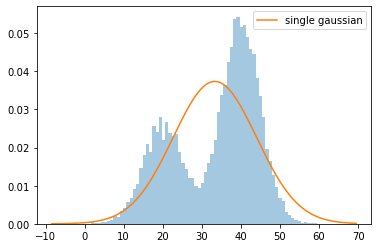

In [65]:

#gaussian of best fit
single = Gaussian(np.mean(sample), np.std(sample))

# Graph the single gaussian fitting to the data
Min_graph = min(sample) -10
Max_graph = max(sample) +10
x = np.linspace(Min_graph, Max_graph, len(sample))
g_single = stats.norm(single.mu, single.sigma).pdf(x)
sns.distplot(sample, bins=70, kde=False, norm_hist=True);
plt.plot(x, g_single, label='single gaussian');
plt.legend();

## The code for EM with 2 Gaussian mixture model

In [70]:
one = Gaussian(np.mean(sample1), np.std(sample1))
two = Gaussian(np.mean(sample2), np.std(sample2))
        

In [69]:
def Estep(data, mix=.5):
    "Perform an E(stimation)-step, assign each point to gaussian 1 or 2 with a percentage"
    # compute weights
    loglike = 0. # = log(p = 1)
    for xi in data:  
        # unnormalized weights
        wp1 = one.pdf(xi) * mix
        wp2 = two.pdf(xi) * (1. - mix)
        # compute denominator
        den = wp1 + wp2
        # normalize
        wp1 /= den   
        wp2 /= den     # wp1+wp2= 1, it either belongs to gaussian 1 or gaussion 2
        # add into loglike
        loglike += log(den) #freshening up self.loglike in the process
        # yield weight tuple
        yield (wp1, wp2)

In [ ]:
class GaussianMixture_self:
    "Model mixture of two univariate Gaussians and their EM estimation"

    def __init__(self, data, mu_min=min(data), mu_max=max(data), sigma_min=1, sigma_max=1, mix=.5):
        self.data = data
        #todo the Algorithm would be numerical enhanced by normalizing the data first, next do all the EM steps and do the de-normalising at the end
        
        #init with multiple gaussians
        self.one = Gaussian(np.mean(sample1), np.std(sample1))
        self.two = Gaussian(np.mean(sample1), np.std(sample1))
        
        #as well as how much to mix them
        self.mix = mix

    def Estep(self):
        "Perform an E(stimation)-step, assign each point to gaussian 1 or 2 with a percentage"
        # compute weights
        self.loglike = 0. # = log(p = 1)
        for datum in self.data:  
            # unnormalized weights
            wp1 = self.one.pdf(datum) * self.mix
            wp2 = self.two.pdf(datum) * (1. - self.mix)
            # compute denominator
            den = wp1 + wp2
            # normalize
            wp1 /= den   
            wp2 /= den     # wp1+wp2= 1, it either belongs to gaussian 1 or gaussion 2
            # add into loglike
            self.loglike += log(den) #freshening up self.loglike in the process
            # yield weight tuple
            yield (wp1, wp2)

    def Mstep(self, weights):
        "Perform an M(aximization)-step"
        # compute denominators
        (left, rigt) = zip(*weights) 
        one_den = sum(left)
        two_den = sum(rigt)

        # compute new means
        self.one.mu = sum(w * d  for (w, d) in zip(left, data)) / one_den
        self.two.mu = sum(w * d  for (w, d) in zip(rigt, data)) / two_den
        
        # compute new sigmas
        self.one.sigma = sqrt(sum(w * ((d - self.one.mu) ** 2)
                                  for (w, d) in zip(left, data)) / one_den)
        self.two.sigma = sqrt(sum(w * ((d - self.two.mu) ** 2)
                                  for (w, d) in zip(rigt, data)) / two_den)
        # compute new mix
        self.mix = one_den / len(data)

        
    def iterate(self, N=1, verbose=False):
        "Perform N iterations, then compute log-likelihood"
        for i in range(1, N+1):
            self.Mstep(self.Estep()) #The heart of the algorith, perform E-stepand next M-step
            if verbose:
                print('{0:2} {1}'.format(i, self))
        self.Estep() # to freshen up self.loglike

    def pdf(self, x):
        return (self.mix)*self.one.pdf(x) + (1-self.mix)*self.two.pdf(x)
        
    def __repr__(self):
        return 'GaussianMixture({0}, {1}, mix={2.03})'.format(self.one, 
                                                              self.two, 
                                                              self.mix)

    def __str__(self):
        return 'Mixture: {0}, {1}, mix={2:.03})'.format(self.one, 
                                                        self.two, 
                                                        self.mix)
print("done")